In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets_tourism_dh import *

In [16]:
START_DATE = "2023-07-01"
END_DATE = "2023-09-30"

LOC_ID_COMUNE_MOLVENO = "27"
LOC_TYPE_COMUNE_MOLVENO = "TN_MKT_AL_3"

In [18]:
def mapping_tmax_val(tmax):
    if tmax>=28:
        return "Caldo"
    elif tmax<=22:
        return "Freddo"
    else:
        return "Normale"
def mapping_tmin_val(tmax):
    if tmax>=16:
        return "Caldo"
    elif tmax<=10:
        return "Freddo"
    else:
        return "Normale"

# Data preparation

In [169]:
########################################## Vodafone attendances
attendences_df = vodafone_attendences_df[
#    (vodafone_attendences_df['date'] >= START_DATE) &
#    (vodafone_attendences_df['date'] <= END_DATE) &
    (vodafone_attendences_df["value"] != 0) &
    (vodafone_attendences_df["userProfile"] != 'INHABITANT') &
    (vodafone_attendences_df["userProfile"] != 'COMMUTER') &
    (vodafone_attendences_df["locId"] == LOC_ID_COMUNE_MOLVENO) &
    (vodafone_attendences_df["locType"] == LOC_TYPE_COMUNE_MOLVENO) ]
attendences_df = attendences_df[['date','userProfile','value']]
# tourists
tourist_attendences_df = attendences_df[attendences_df['userProfile'] == "TOURIST"][['date','value']].groupby('date').sum()
tourist_attendences_df['weekday'] = pd.to_datetime(tourist_attendences_df.index).weekday
tourist_attendences_df.rename(columns={"value": "presences_tourists"}, inplace=True)
# excursionists
excursionist_attendences_df = attendences_df[attendences_df['userProfile'] == "VISITOR"][['date','value']].groupby('date').sum()
excursionist_attendences_df['weekday'] = pd.to_datetime(excursionist_attendences_df.index).weekday
excursionist_attendences_df['month'] = pd.to_datetime(excursionist_attendences_df.index).month
excursionist_attendences_df['year'] = pd.to_datetime(excursionist_attendences_df.index).year
excursionist_attendences_df.rename(columns={"value": "presences_excursionists"}, inplace=True)

############################################# Weather in Molveno
meteo_df = meteotrentino_bollettino_df[
    (meteotrentino_bollettino_df["comune"].str.contains("MOLVENO")) &
    (meteotrentino_bollettino_df["data"] >= "2023-01-01") #&
    #(meteotrentino_bollettino_df["data"] <= END_DATE)
][['data', "tmax", "tmin", "probprec06-12", "probprec12-18"]].set_index('data')
meteo_df["tmax_group"] = meteo_df["tmax"].map(mapping_tmax_val)
meteo_df["tmin_group"] = meteo_df["tmin"].map(mapping_tmin_val)

############################################  Merged dataset: Presences + Meteo
tourist_attendences_meteo_df = pd.merge(tourist_attendences_df, meteo_df, how='outer', left_index=True, right_index=True).fillna(0)
excursionist_attendences_meteo_df = pd.merge(excursionist_attendences_df, meteo_df, how='outer', left_index=True, right_index=True).fillna(0).fillna('--')


In [170]:
meteotrentino_bollettino_df

,data,comune,ambito,meteo,tmin,tmax,probprec06-12,intprec06-12,probtemp06-12,probprec12-18,intprec12-18,probtemp12-18
0,2018-03-03,BASELGA DI PINE',TRENTO,Molto nuvoloso,-4,2,molto bassa,debole,--,molto bassa,debole,--
1,2018-03-03,CANAZEI,MADONNA,Molto nuvoloso,-6,4,molto bassa,debole,--,molto bassa,debole,--
2,2018-03-03,CAVALESE,FIEMME,Molto nuvoloso,-4,3,molto bassa,debole,--,molto bassa,debole,--
3,2018-03-03,FOLGARIA,ALTIPIANO,Molto nuvoloso,-3,2,molto bassa,debole,--,molto bassa,debole,--
4,2018-03-03,FONDO,VALDINON,Molto nuvoloso,-4,3,molto bassa,debole,--,molto bassa,debole,--
...,...,...,...,...,...,...,...,...,...,...,...,...
41408,2024-05-31,COMANO TERME,GARDA,Coperto con piogge moderate,12,15,alta,forte,bassa,alta,moderata,bassa
41409,2024-05-31,BEZZECCA,GARDA,Coperto con piogge moderate,11,14,alta,forte,bassa,alta,moderata,bassa
41410,2024-05-31,PIEVE DI BONO,MADONNA,Coperto con piogge moderate,13,16,alta,forte,bassa,alta,moderata,bassa
41411,2024-05-31,CENTA SAN NICOLO,ALTIPIANO,Coperto con piogge moderate,11,14,alta,forte,bassa,alta,moderata,bassa


In [171]:
resulting_T_E = pd.concat([excursionist_attendences_meteo_df, tourist_attendences_meteo_df[["presences_tourists"]]], axis=1)
resulting_T_E

,presences_excursionists,weekday,month,year,tmax,tmin,probprec06-12,probprec12-18,tmax_group,tmin_group,presences_tourists
2022-01-01,3130.0,5.0,1.0,2022.0,0.0,0.0,0,0,0,0,4550.0
2022-01-02,2926.0,6.0,1.0,2022.0,0.0,0.0,0,0,0,0,5110.0
2022-01-03,1757.0,0.0,1.0,2022.0,0.0,0.0,0,0,0,0,3643.0
2022-01-04,1356.0,1.0,1.0,2022.0,0.0,0.0,0,0,0,0,3337.0
2022-01-05,546.0,2.0,1.0,2022.0,0.0,0.0,0,0,0,0,3255.0
...,...,...,...,...,...,...,...,...,...,...,...
2024-05-25,0.0,0.0,0.0,0.0,18.0,10.0,media,media,Freddo,Freddo,0.0
2024-05-28,0.0,0.0,0.0,0.0,19.0,13.0,bassa,media,Freddo,Normale,0.0
2024-05-29,0.0,0.0,0.0,0.0,21.0,9.0,--,bassa,Freddo,Freddo,0.0
2024-05-30,0.0,0.0,0.0,0.0,19.0,11.0,media,media,Freddo,Normale,0.0


<Axes: >

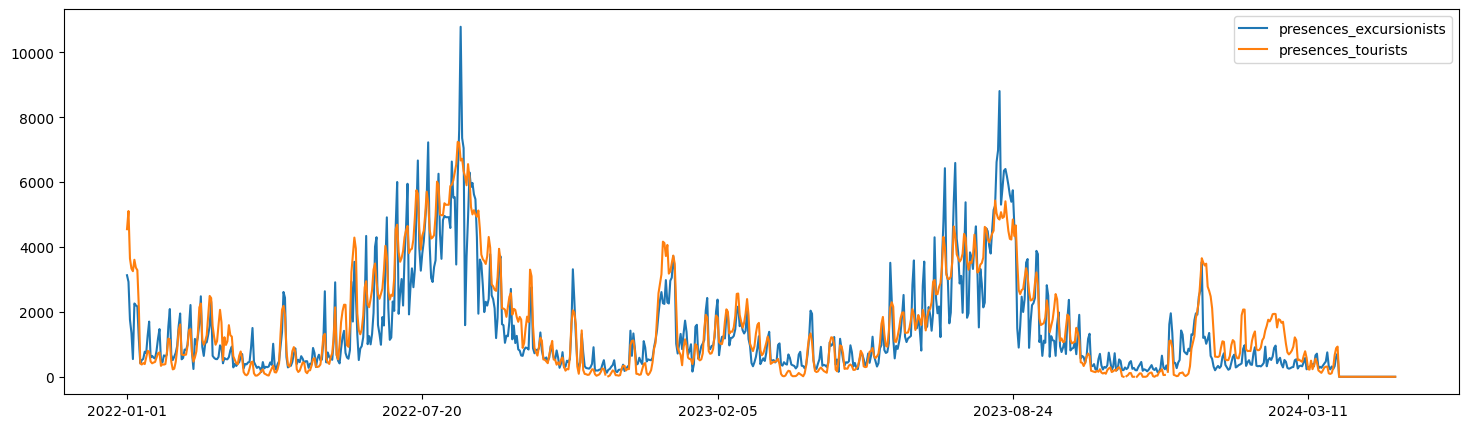

In [172]:
resulting_T_E[["presences_excursionists", "presences_tourists"]].plot(figsize=(18, 5))

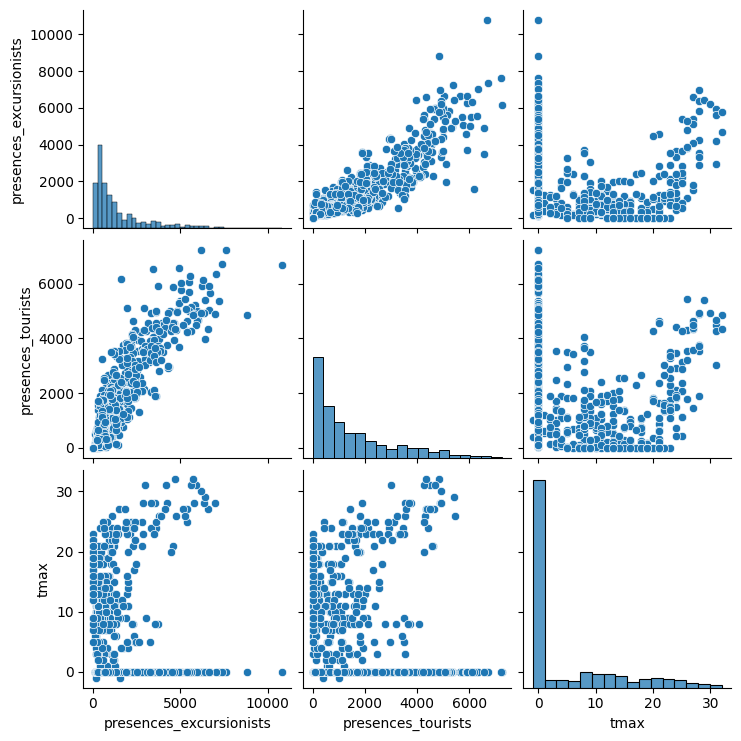

In [173]:
sns.pairplot(resulting_T_E[["presences_excursionists", "presences_tourists", "tmax"]])

# Statistical analysis

In [174]:
import statsmodels.api as sm

# Independent variables
resulting_T_E1 = resulting_T_E.reset_index()
resulting_T_E1["tmax"] = resulting_T_E1["tmax"].astype("int")
resulting_T_E1["tmin"] = resulting_T_E1["tmin"].astype("int")
X = resulting_T_E1[["presences_excursionists", "tmax", "tmin"]]

# Our dependent variable
y = resulting_T_E1.reset_index()[["presences_tourists"]]
# Add a constant to the independent value
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary statistics of the regression model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     presences_tourists   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 21 Nov 2024   Prob (F-statistic):                nan
Time:                        09:34:13   Log-Likelihood:                    nan
No. Observations:                 860   AIC:                               nan
Df Residuals:                     856   BIC:                               nan
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

# Method 1: Stratification
This involves  breaking up our data into homogeneous strata or groups where the confounding factor is constant.

Example:Divide one year into seazons according to the attendances, approximation[(December, January, February), (March, April, May), (June, July, August), (September, October, Novembre)]


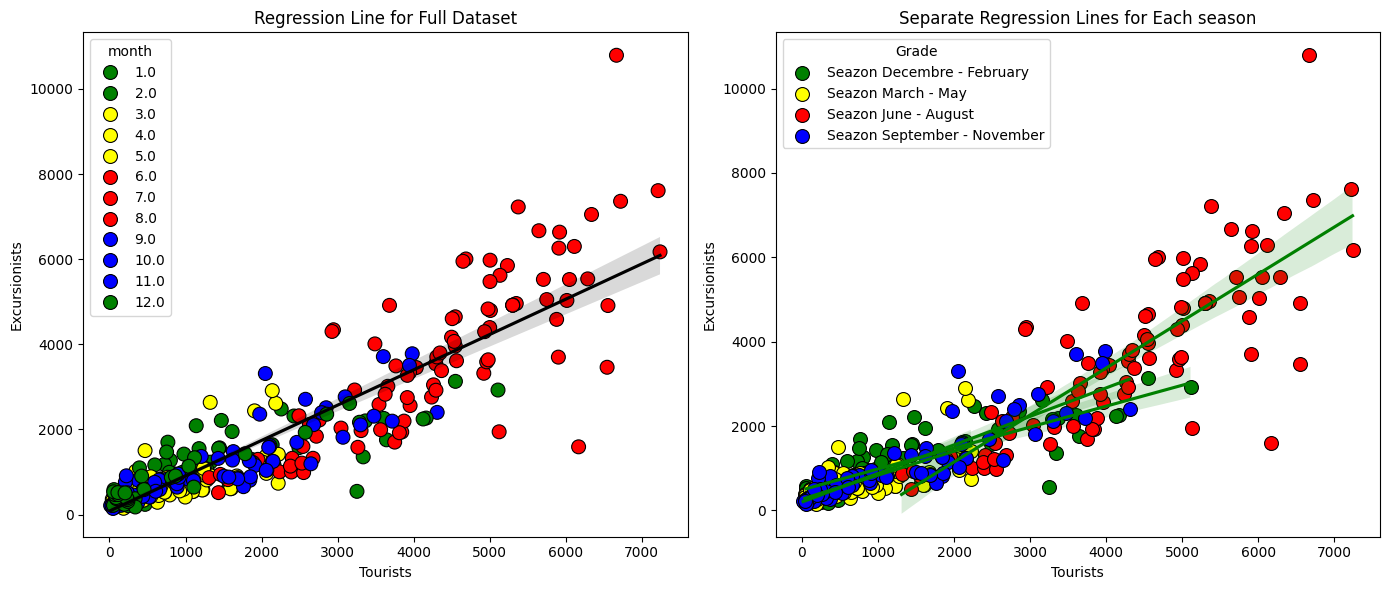

In [175]:
def plot_seasons(year):
    if year is not None:
        resulting_T_E_df = resulting_T_E[resulting_T_E["year"] == year]
    seazon_dec_feb = resulting_T_E_df[resulting_T_E_df['month'].isin([12, 1, 2])]
    seazon_mar_may = resulting_T_E_df[resulting_T_E_df['month'].isin([3, 4, 5])]
    seazon_june_aug = resulting_T_E_df[resulting_T_E_df['month'].isin([6, 7, 8])]
    seazon_sep_nov = resulting_T_E_df[resulting_T_E_df['month'].isin([9, 10, 11])]
    colors = { 3: 'yellow', 4: 'yellow', 5: 'yellow',
              6: 'red', 7: 'red', 8: 'red', 
              9: 'blue', 10: 'blue', 11: 'blue',
              12: 'green', 1: 'green', 2: 'green'}
    # Create the first plot (full dataset regression)
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)  # First plot
    sns.scatterplot(x='presences_tourists', y='presences_excursionists', hue='month', palette=colors, data=resulting_T_E_df, s=100, edgecolor='k')
    sns.regplot(x='presences_tourists', y='presences_excursionists', data=resulting_T_E_df, scatter=False, color='black', label='Full Dataset')
    plt.title('Regression Line for Full Dataset')
    plt.xlabel('Tourists')
    plt.ylabel('Excursionists')
    # Create the second plot (regression per grade)
    plt.subplot(1, 2, 2)  # Second plot
    #################### plot each seazon
    # december - february
    sns.scatterplot(x='presences_tourists', y='presences_excursionists', data=seazon_dec_feb, color=colors[12], s=100, edgecolor='k', label=f'Seazon Decembre - February')
    sns.regplot(x='presences_tourists', y='presences_excursionists', data=seazon_dec_feb, scatter=False, color=colors[12])
    # march - may
    sns.scatterplot(x='presences_tourists', y='presences_excursionists', data=seazon_mar_may, color=colors[3], s=100, edgecolor='k', label=f'Seazon March - May')
    sns.regplot(x='presences_tourists', y='presences_excursionists', data=seazon_mar_may, scatter=False, color=colors[12])
    # june - august
    sns.scatterplot(x='presences_tourists', y='presences_excursionists', data=seazon_june_aug, color=colors[6], s=100, edgecolor='k', label=f'Seazon June - August')
    sns.regplot(x='presences_tourists', y='presences_excursionists', data=seazon_june_aug, scatter=False, color=colors[12])
    # september - Novembre
    sns.scatterplot(x='presences_tourists', y='presences_excursionists', data=seazon_sep_nov, color=colors[9], s=100, edgecolor='k', label=f'Seazon September - November')
    sns.regplot(x='presences_tourists', y='presences_excursionists', data=seazon_sep_nov, scatter=False, color=colors[12])
    plt.title('Separate Regression Lines for Each season')
    plt.xlabel('Tourists')
    plt.ylabel('Excursionists')
    plt.legend(title='Grade')
    # Display the plots
    plt.tight_layout()
    plt.show()
plot_seasons(2022)

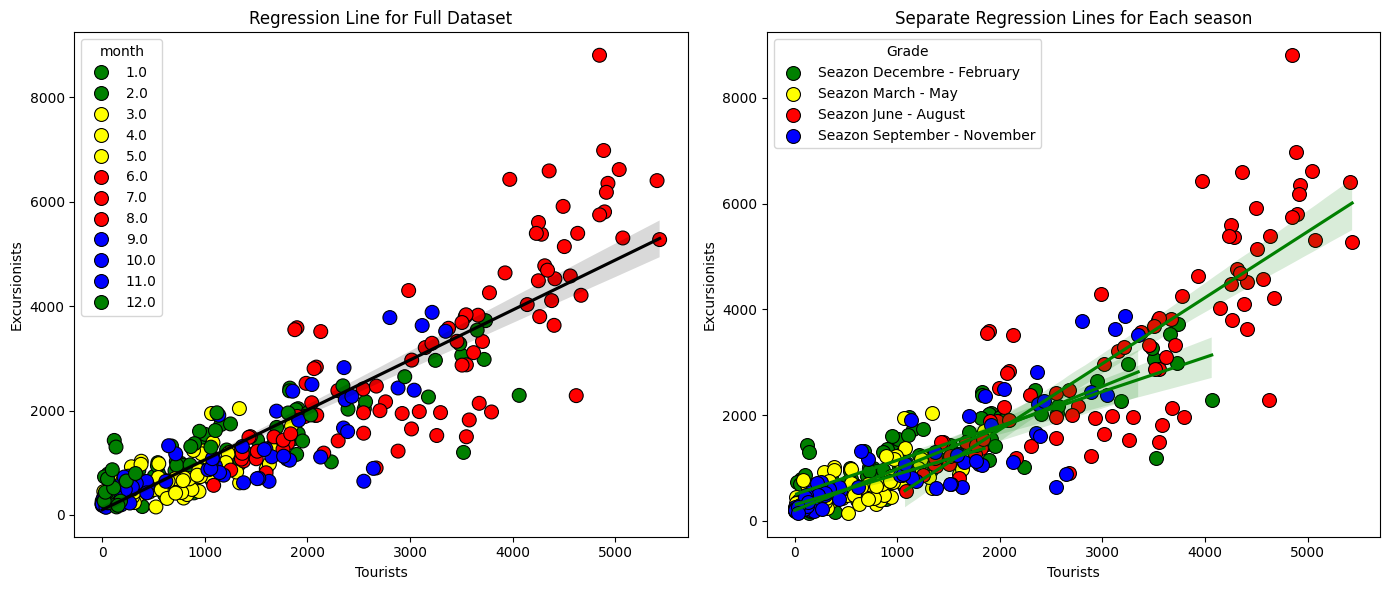

In [176]:
plot_seasons(2023)

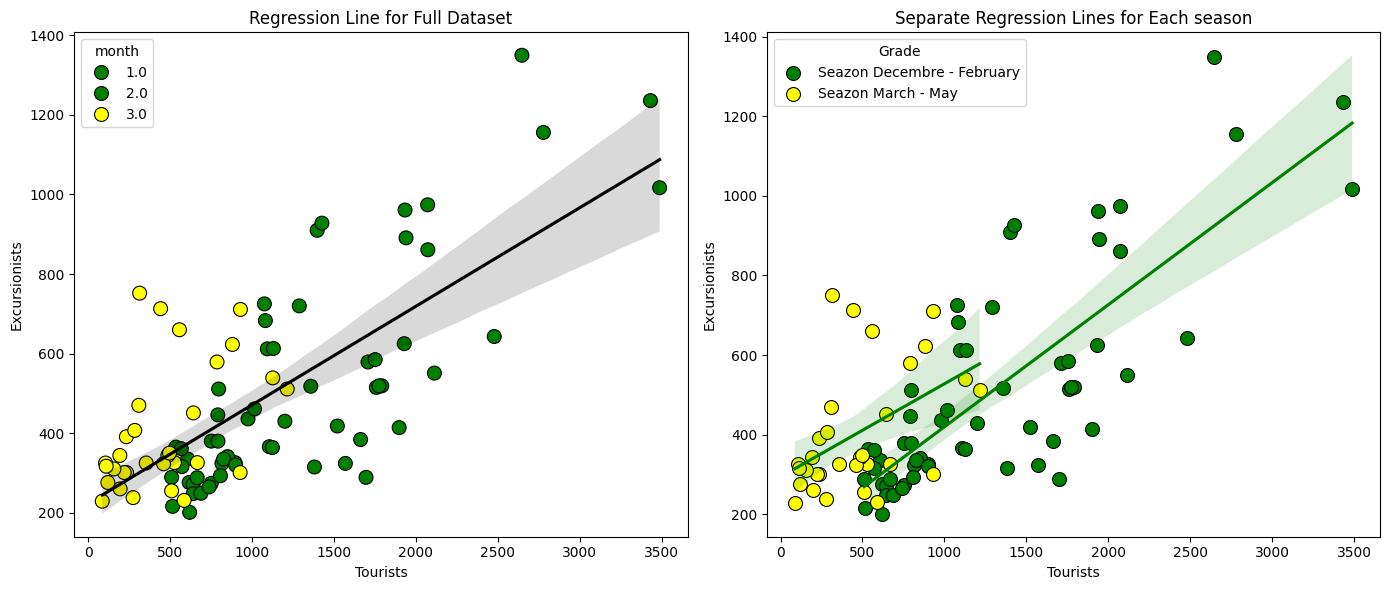

In [177]:
plot_seasons(2024)

# Method 2: Matching
In this method, for every entry in one group, you find a corresponding entry in the other group(s) that has the same or nearly the same value for the confounding variable(s). This method reduces the impact of confounding factors. Scikit-learn’s NearestNeighbors can be used to find matching pairs.

# Method 3: Multivariable analysis
You can use statistical methods that consider all variables at the same time. For instance, a regression analysis will allow you to see the effect of your independent variable on your dependent variable, while controlling for other variables. 
- libraries like statsmodels or scikit-learn to run multivariable regressions.

# Method 4: Propensity Score Matching (PSM)
This is a statistical matching technique that attempts to estimate the effect of a treatment, policy, or other intervention by accounting for the covariates that predict receiving the treatment. 
- causalinference and PyMatch are libraries that can be used to implement PSM

# Method 5: Instrumental Variable (IV) methods


In [116]:
import numpy as np
from statsmodels.datasets import grunfeld
data = grunfeld.load_pandas().data
data.year = data.year.astype(np.int64)
# MultiIndex, entity - time
data = data.set_index(['firm','year'])
from linearmodels import PanelOLS
mod = PanelOLS(data.invest, data[['value','capital']], entity_effects=True)
res = mod.fit(cov_type='clustered', cluster_entity=True)
res

Dep. Variable:,invest,R-squared:,0.7667
Estimator:,PanelOLS,R-squared (Between):,0.8223
No. Observations:,220,R-squared (Within):,0.7667
Date:,"Wed, Nov 20 2024",R-squared (Overall):,0.8132
Time:,15:47:30,Log-likelihood,-1167.4
Cov. Estimator:,Clustered,,
,,F-statistic:,340.08
Entities:,11,P-value,0.0000
Avg Obs:,20.000,Distribution:,"F(2,207)"
Min Obs:,20.000,,
Max Obs:,20.000,F-statistic (robust):,31.490


# Important Notes
- Confounding factors are variables that influence both the independent and dependent variables, creating a potential spurious association. It’s crucial to identify and control for these variables to prevent bias in statistical analysis.
- By understanding and properly handling confounding factors, we can make more accurate and meaningful inferences from our data, leading to more effective decisions and actions.